In [ ]:
import pandas as pd
import numpy as np
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
#Nhap dữ liệu từ file data
#Xuất ra 10 dòng đầu dữ liệu

data_df=pd.read_excel('Annotation_AllVideos_FPT_Ver1.xlsx')
data_df.head(10)

,e,no. video,Student ID,viewer,id,standardized dish,dish occurence (based on transcript),dish imply,start time,end time,...,describe how to make it,Unnamed: 19,viewer feeling of presented food,YouTuber feeling,location,foreigner,t,time,num,YouTuber
0,NaN,-1.0,SE160880,2,k2nZZ3eSIeU,Vietnamese grilled rice papper,NaN,Bánh tráng nướng,8:16,2:36,...,1,NaN,NaN,5,HCM,NaN,-0.236111,-14.166667,19,0
1,NaN,-1.0,SE160513,4,HK6X5fkI6sg,Vietnamese mixed rice paper,banh trang tron,Bánh tráng trộn,5:55,4:20,...,1,NaN,3,4,Hoi An,Y,-0.065972,-3.958333,18,1
2,NaN,-1.0,SE160880,1,k2nZZ3eSIeU,coconut sticky rice,frightened but not,Xôi dừa,10:45,4:44,...,1,NaN,5,5,NaN,N,-0.250694,-15.041667,18,1
3,NaN,-1.0,SE160880,5,jKXf0M1mFQg,Vietnamese steamed rice rolls,"the fun, one goon",Bánh cuốn,05:52:00,3:58,...,1,NaN,1,3,Da Nang,Y,-0.079167,-4.750000,18,1
4,596.0,1.0,NaN,5,qH9Q3ee0LQY,curry,duck curry,NaN,7:40,6:45,...,1,NaN,5,5,Hoi An,Y,-0.038194,-2.291667,18,1
5,595.0,1.0,NaN,5,qH9Q3ee0LQY,sticky rice,xoi,NaN,5:41,8:07,...,1,NaN,NaN,5,HN,1,0.101389,6.083333,17,1
6,594.0,1.0,NaN,5,qH9Q3ee0LQY,fried noodles,noodles,mì xào,5:06,9:38,...,1,NaN,NaN,5,DnHa,NaN,0.188889,11.333333,17,1
7,593.0,1.0,NaN,5,qH9Q3ee0LQY,rice dumpling cake,banh bot,NaN,3:50,11:04,...,1,NaN,5,5,America,Y,0.301389,18.083333,16,1
8,592.0,1.0,NaN,5,qH9Q3ee0LQY,shrimp dumpling,ha cao / xiu mai,NaN,2:51,16:15,...,1,NaN,NaN,5,DnHa,NaN,0.558333,33.500000,16,1
9,599.0,1.0,NaN,5,qH9Q3ee0LQY,takoyaki,fish cone mold,kem cá phô mai,18:52,7:22,...,1,NaN,NaN,5,HCM,NaN,-0.479167,-28.750000,16,1


In [ ]:
#Lấy những feature cần thiết.
m=data_df[['container','venue','time','describe how to make it','num','viewer','YouTuber']]
m

,container,venue,time,describe how to make it,num,viewer,YouTuber
0,bag,street restaurant,-14.166667,1,19,2,0
1,bag,street restaurant,-3.958333,1,18,4,1
2,bag,street restaurant,-15.041667,1,18,1,1
3,bag,street restaurant,-4.750000,1,18,5,1
4,bag,street restaurant,-2.291667,1,18,5,1
...,...,...,...,...,...,...,...
3535,tray,casual restaurant,30.416667,0,0,5,1
3536,tray,casual restaurant,24.916667,0,0,5,1
3537,tray,casual restaurant,25.125000,0,0,5,1
3538,tray,casual restaurant,20.833333,0,0,5,1


In [ ]:
# Do một số bạn ghi nhầm chỗ end và start nên số âm => chuyển về thành dương
for i in range(m['time'].shape[0]):
    c=m['time'][i]
    if c<0:
        m.loc[i,'time']=-c

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
m

,container,venue,time,describe how to make it,num,viewer,YouTuber
0,bag,street restaurant,14.166667,1,19,2,0
1,bag,street restaurant,3.958333,1,18,4,1
2,bag,street restaurant,15.041667,1,18,1,1
3,bag,street restaurant,4.750000,1,18,5,1
4,bag,street restaurant,2.291667,1,18,5,1
...,...,...,...,...,...,...,...
3535,tray,casual restaurant,30.416667,0,0,5,1
3536,tray,casual restaurant,24.916667,0,0,5,1
3537,tray,casual restaurant,25.125000,0,0,5,1
3538,tray,casual restaurant,20.833333,0,0,5,1


In [ ]:
# Sử dụng sơ đồ Boxplot để tối ưu hóa dữ liệu

from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [ ]:
#Tối ưu hóa 2 feather time và num

clipped_total_rooms = BoxplotOutlierClipper().fit_transform(data_df["time"])
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(data_df["num"])

In [ ]:
#Tách dữ liệu(sử dụng tổng cộng 5 featuresfeatures 'time','describe how to make it','num','viewer','YouTuber') để phân loại nhóm

x=m[['time','num','YouTuber']].values
data=m[['container','venue','time','describe how to make it','num','viewer','YouTuber']]
x

array([[14.16666667, 19.        ,  0.        ],
       [ 3.95833333, 18.        ,  1.        ],
       [15.04166667, 18.        ,  1.        ],
       ...,
       [25.125     ,  0.        ,  1.        ],
       [20.83333333,  0.        ,  1.        ],
       [ 0.25      ,  0.        ,  1.        ]])

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Sử dụng phương pháp tối ưu Elbow xác định k tối ưu phù hợp với dữ liệu
# Xét k từ 0 -> 14 để chọn số tối ưuưu

wcss=[]
for i in range(1,15):
  kmean=KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmean.fit(x)
  wcss.append(kmean.inertia_)

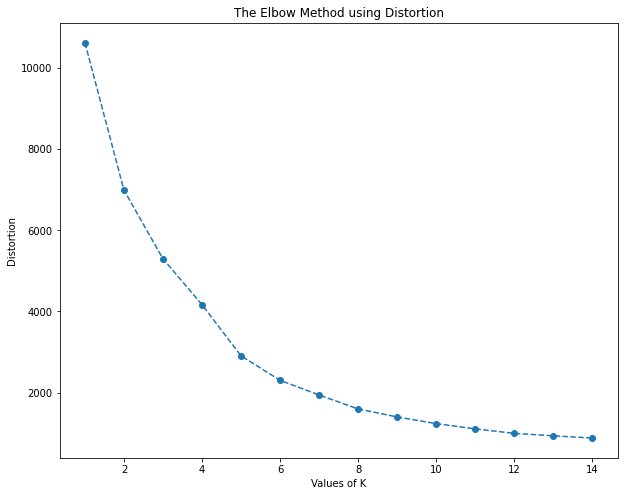

In [ ]:
# Vẽ biểu đồ cho Elbow -> chọn số k tại điểm có khúc cua, mà ở đây là 5

plt.figure(figsize=(10,8))
plt.plot(range(1,15), wcss,marker='o',linestyle='--')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# Số lượng nhóm tối ưu cho Kmean là 5
kmean=KMeans(n_clusters=5, init='k-means++',random_state=0)
kmean.fit(x)

KMeans(n_clusters=5, random_state=0)

In [ ]:
new_data=pd.concat([data.reset_index(drop=True),pd.DataFrame(x)],axis=1)
new_data.columns.values[-3:]=['component1','component2','component3']
new_data['cluster']=kmean.labels_
new_data.head()

,container,venue,time,describe how to make it,num,viewer,YouTuber,component1,component2,component3,cluster
0,bag,street restaurant,14.166667,1,19,2,0,-0.013596,5.636454,-4.109728,3
1,bag,street restaurant,3.958333,1,18,4,1,-0.771928,5.276459,-3.113737,3
2,bag,street restaurant,15.041667,1,18,1,1,0.051404,5.276459,-3.113737,3
3,bag,street restaurant,4.750000,1,18,5,1,-0.713119,5.276459,-3.113737,3
4,bag,street restaurant,2.291667,1,18,5,1,-0.895738,5.276459,-3.113737,3


In [ ]:
#Gán nhãn cho dữ liệuliệu

new_data['segment']=new_data['cluster'].map({0:'0',1:'1',2:'2',3:'3',4:'4'})
new_data['segment'].shape

(3540,)

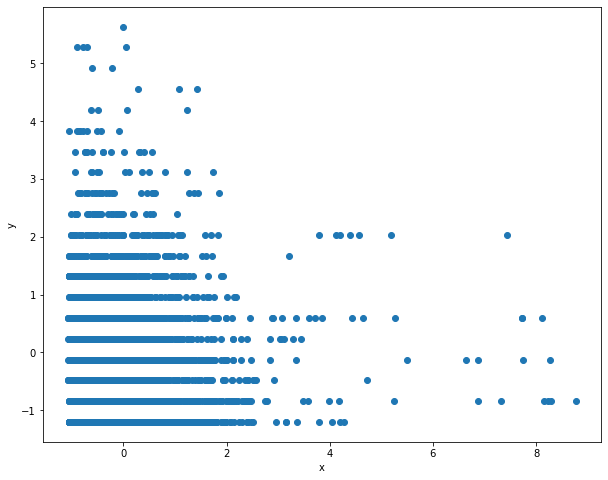

In [ ]:
#Biểu diễn dữ liệu khi chưa phân nhóm

from mpl_toolkits import mplot3d
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



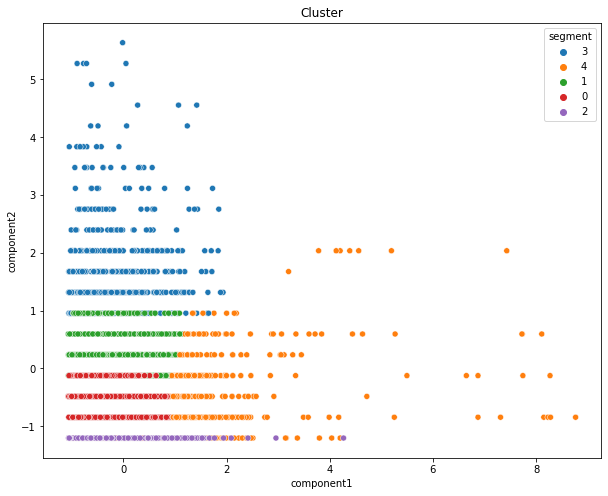

In [ ]:
#Biểu diễn dữ liệu khi đã phân nhóm (5 nhómnhóm)

x_axis=new_data['component1']
y_axis=new_data['component2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=new_data['segment'])
plt.title('Cluster')
plt.show()

In [ ]:
new_data['segment'].value_counts()

0    1315
1    1124
3     590
4     380
2     131
Name: segment, dtype: int64

In [ ]:
#Do số chiều dữ liệu là 3 nên ta biểu diễn 3D cho rõ hơn

import plotly.graph_objs as go
import plotly as py
labels=kmean.labels_
new_data['segment']=labels
plt.figure(figsize=(10,8))
trace=go.Scatter3d(x=new_data['component1'],
                   y=new_data['component2'],
                   z=new_data['component3'],
                   mode='markers',
                   marker=dict(color=new_data['segment'],size=5,line=dict(color=new_data['segment'],width=12),opacity=0.8)
                   )
data=[trace]
layout=go.Layout(
                 title='Cluster',
                 scene=dict(
                        xaxis=dict(title='component 1'),
                        yaxis=dict(title='component 2'),
                        zaxis=dict(title='component 3'))
)

fig=go.Figure(data=data,layout=layout)
py.offline.iplot(fig)
plt.show()

<Figure size 720x576 with 0 Axes>

In [ ]:
#Sử dụng PCA từ thư viện sklearn.decomposition để giảm chiều dữ liệu
pca=PCA()
pca.fit(x)
phan_tram = pca.explained_variance_ratio_

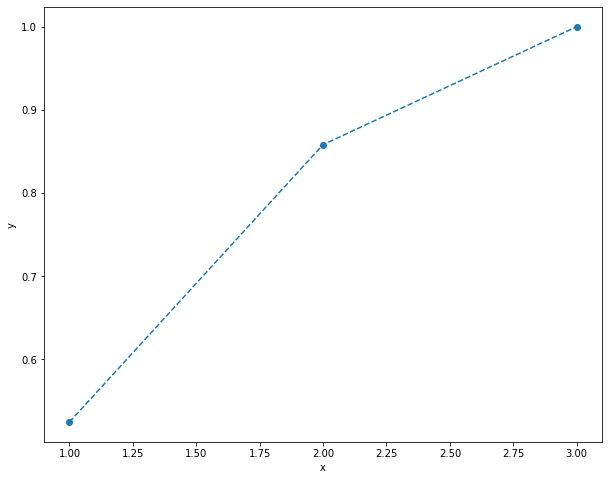

In [ ]:
# Vẽ biểu đồ sau khi giảm chiều dữ liệu để chọn số lượng component phù hợp
# Một nguyên tắc chung là duy trì khoảng 80% phương sai
# Chọn giữ lại 2 components

from mpl_toolkits import mplot3d
plt.figure(figsize=(10,8))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# Sử dụng PCA với components=22

pca=PCA(n_components=2,random_state=0)
pca.fit(x)

PCA(n_components=2, random_state=0)

In [ ]:
# transform dữ liệuliệu
x_pca=pca.transform(x)

In [ ]:
#Dữ liệu sau khi đã transformtransform
x_pca

array([[ 6.87039668,  0.49459846],
       [ 5.98363046, -0.38227187],
       [ 5.9113532 ,  0.43454544],
       ...,
       [ 1.26321057,  1.18670827],
       [ 1.29119763,  0.87042187],
       [ 1.42542682, -0.64652456]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



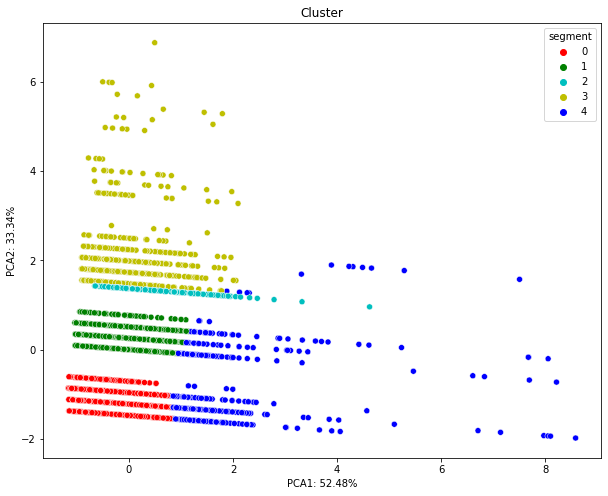

In [ ]:
#Biểu diễn dữ liệu 2D để phân nhóm sau khi đã giảm chiều dữ liệu với PCAPCA

x_axis=x_pca[:,1]
y_axis=x_pca[:,0]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=new_data['segment'],palette=['r','g','c','y','b'])
plt.title('Cluster')
plt.xlabel('PCA1: '+str(round(phan_tram[0]*100,2))+'%')
plt.ylabel('PCA2: '+str(round(phan_tram[1]*100,2))+'%')
plt.show()